In [1]:
import pandas as pd


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data_train = pd.read_csv('train.csv')
sample = pd.read_csv('sample_submission.csv')

In [4]:
display(data_train.head())
display(data_train.info())
display(data_train.describe())
display(data_train.isna().sum())

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB


None

,year,condition,odometer,sellingprice
count,440236.000000,430831.000000,440167.000000,440236.000000
mean,2010.040101,3.425077,68344.421604,13592.209588
std,3.977945,0.949973,53542.203908,9751.479098
min,1982.000000,1.000000,1.000000,1.000000
25%,2007.000000,2.700000,28258.000000,6900.000000
50%,2012.000000,3.600000,52098.000000,12100.000000
75%,2013.000000,4.200000,99272.000000,18200.000000
max,2015.000000,5.000000,999999.000000,230000.000000


year                0
make             8043
model            8123
trim             8337
body            10393
transmission    51461
vin                 0
state               0
condition        9405
odometer           69
color             586
interior          586
seller              0
sellingprice        0
saledate            0
dtype: int64

## Год

In [5]:
data_train['year'].sort_values().unique()

array([1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

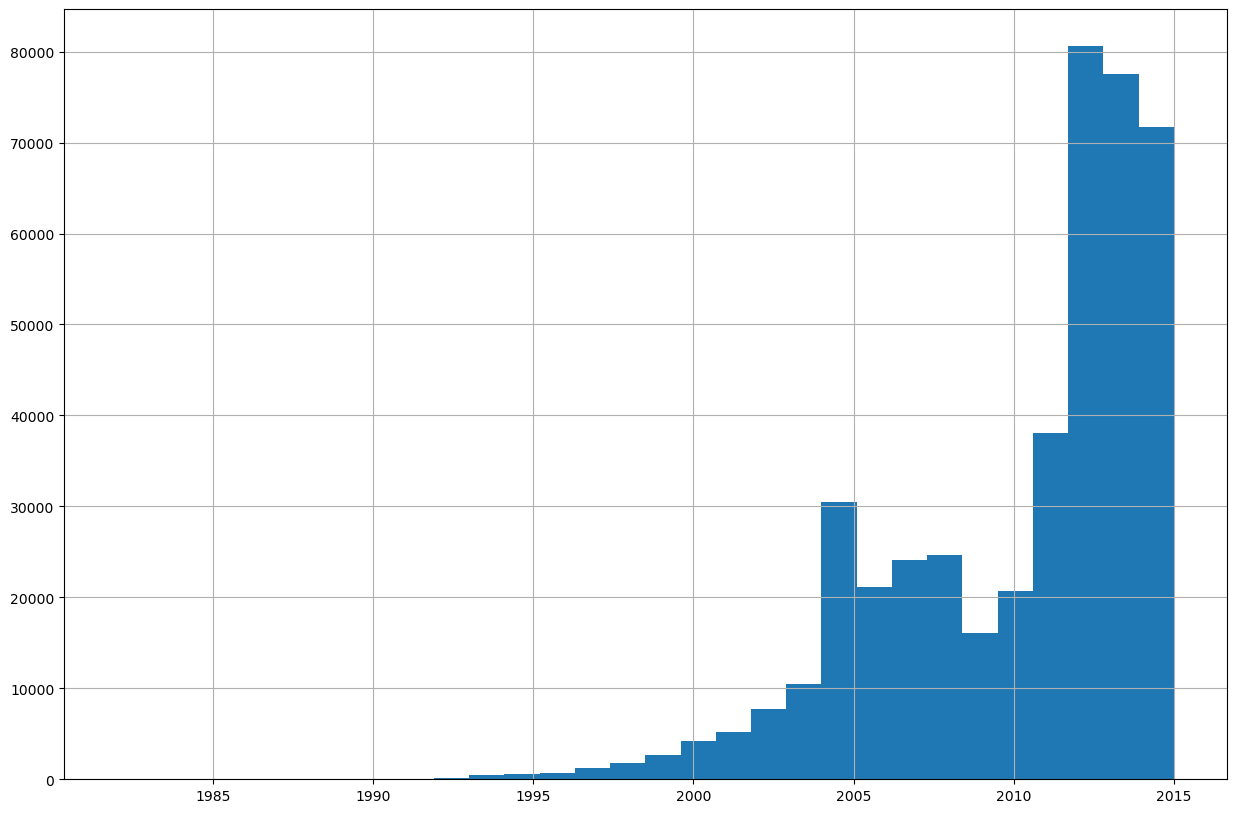

In [6]:
data_train['year'].hist(bins=30,figsize=(15,10));

In [7]:
data_train['year'].value_counts()

2012    80625
2013    77566
2014    64225
2011    38115
2008    24646
2007    24152
2006    21118
2010    20647
2005    16794
2009    16064
2004    13658
2003    10512
2002     7726
2015     7462
2001     5147
2000     4161
1999     2658
1998     1747
1997     1224
1996      683
1995      567
1994      319
1993      168
1992      103
1991       56
1990       38
1989       15
1988       11
1985       10
1986        8
1987        5
1984        4
1983        1
1982        1
Name: year, dtype: int64

## Марка

Посмотрим уникальные значения в столбце

In [8]:
data_train['make'].nunique()

92

Приведем к нижнему регистру

In [9]:
data_train['make'] = data_train['make'].str.upper()

Выведем список всех марок авто.

In [10]:
data_train['make'].sort_values().unique()#Выведем все названия населённых пунктов в столбце locality_name 

array(['ACURA', 'AIRSTREAM', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DAEWOO', 'DODGE',
       'DODGE TK', 'DOT', 'FERRARI', 'FIAT', 'FISKER', 'FORD',
       'FORD TRUCK', 'GEO', 'GMC', 'GMC TRUCK', 'HONDA', 'HUMMER',
       'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LANDROVER', 'LEXUS', 'LINCOLN',
       'MASERATI', 'MAZDA', 'MAZDA TK', 'MERCEDES', 'MERCEDES-B',
       'MERCEDES-BENZ', 'MERCURY', 'MINI', 'MITSUBISHI', 'NISSAN',
       'OLDSMOBILE', 'PLYMOUTH', 'PONTIAC', 'PORSCHE', 'RAM',
       'ROLLS-ROYCE', 'SAAB', 'SATURN', 'SCION', 'SMART', 'SUBARU',
       'SUZUKI', 'TESLA', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'VW', nan],
      dtype=object)

Есть дубликаты, такие как dodge и dodge tk и ram, ford и ford truck, gmc и gmc truck, land rover и landrover, mazda и mazda tk, mercedes и mercedes-b и mercedes-benz, volkswagen и vw. Уберем неявные дубликаты.

In [11]:
data_train['make'] = data_train['make'].str.replace('DODGE TK','DODGE')
data_train['make'] = data_train['make'].str.replace('RAM','DODGE')
data_train['make'] = data_train['make'].str.replace('FORD TRUCK', 'FORD')
data_train['make'] = data_train['make'].str.replace('LANDROVER', 'LAND ROVER')
data_train['make'] = data_train['make'].str.replace('MERCEDES-BENZ','MERCEDES')
data_train['make'] = data_train['make'].str.replace('MERCEDES-B', 'MERCEDES')
data_train['make'] = data_train['make'].str.replace('GMC TRUCK', 'GMC')
data_train['make'] = data_train['make'].str.replace('MAZDA TK', 'MAZDA')
data_train['make'] = data_train['make'].str.replace('VW', 'VOLKSWAGEN')

In [12]:
data_train['make'].sort_values().unique()

array(['ACURA', 'AIRSTREAM', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DAEWOO', 'DODGE',
       'DOT', 'FERRARI', 'FIAT', 'FISKER', 'FORD', 'GEO', 'GMC', 'HONDA',
       'HUMMER', 'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES', 'MERCURY', 'MINI', 'MITSUBISHI', 'NISSAN',
       'OLDSMOBILE', 'PLYMOUTH', 'PONTIAC', 'PORSCHE', 'ROLLS-ROYCE',
       'SAAB', 'SATURN', 'SCION', 'SMART', 'SUBARU', 'SUZUKI', 'TESLA',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', nan], dtype=object)

## Модель

In [13]:
data_train['model'].sort_values().unique()

array(['1 Series', '1500', '190-Class', '2 Series', '200', '200SX',
       '2500', '3', '3 Series', '3 Series Gran Turismo', '300',
       '300-Class', '3000GT', '300M', '300ZX', '300e', '320i', '323i',
       '328i', '3500', '350Z', '350z', '370Z', '4 Series',
       '4 Series Gran Coupe', '400-Class', '420-Class', '420sel', '42c',
       '458 Italia', '4Runner', '5 Series', '5 Series Gran Turismo',
       '500', '500-Class', '500L', '500e', '6', '6 Series',
       '6 Series Gran Coupe', '626', '7', '7 Series', '750i', '750li',
       '750lxi', '8 Series', '850', '9-2X', '9-3', '9-5', '9-7X', '911',
       '940', '960', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'ATS', 'Acadia',
       'Accent', 'Accord', 'Accord Crosstour', 'Accord Hybrid',
       'ActiveHybrid 5', 'ActiveHybrid 7', 'ActiveHybrid X6', 'Aerio',
       'Alero', 'Altima', 'Altima Hybrid', 'Amanti', 'Amigo', 'Armada',
       'Ascender', 'Aspen', 'Aspire', 'Astra', 'Astro', 'Astro Cargo',
       'Aura', 'Aura Hybrid', 'Aurora', 

Приведем модель к нижнему регистру

In [14]:
data_train['model'] = data_train['model'].str.lower()
data_train['model'].sort_values().unique()

array(['1 series', '1500', '190-class', '2 series', '200', '200sx',
       '2500', '3', '3 series', '3 series gran turismo', '300',
       '300-class', '3000gt', '300e', '300m', '300zx', '320i', '323i',
       '328i', '3500', '350z', '370z', '4 series', '4 series gran coupe',
       '400-class', '420-class', '420sel', '42c', '458 italia', '4runner',
       '5 series', '5 series gran turismo', '500', '500-class', '500e',
       '500l', '6', '6 series', '6 series gran coupe', '626', '7',
       '7 series', '750i', '750li', '750lxi', '8 series', '850', '9-2x',
       '9-3', '9-5', '9-7x', '911', '940', '960', 'a3', 'a4', 'a5', 'a6',
       'a7', 'a8', 'acadia', 'accent', 'accord', 'accord crosstour',
       'accord hybrid', 'activehybrid 5', 'activehybrid 7',
       'activehybrid x6', 'aerio', 'alero', 'allroad', 'allroad quattro',
       'alp', 'altima', 'altima hybrid', 'amanti', 'amigo', 'armada',
       'ascender', 'aspen', 'aspire', 'astra', 'astro', 'astro cargo',
       'ats', 'aur

In [15]:
data_train['model'].value_counts()

altima            15454
f-150             11408
fusion            10244
camry             10000
escape             9447
                  ...  
420-class             1
c230                  1
rrs                   1
activehybrid 5        1
g500                  1
Name: model, Length: 839, dtype: int64

## Салон

## Тип кузова

## Трансмиссия

## ВИН

## Состояние

## Пробег

## Цвет кузова

## Продавец

## Рыночная стоимость

## Дата продажи

## Цена продажи

## Цвет салона